# Prelucrarea avansată a datelor si compararea modelelor
## Prelucrarea datelor
In continuare am plecat de dataset-ul partial realizat de colegul de echipa si l-am prelucat, pentru o analiza mai usuara am copiat descrierea colegului pentru coloanele existente:
| Nume                | Tip      | Descriere                                      |
|---------------------|----------|------------------------------------------------|
| rev_util            | float    | Utilizarea limitei cardului procentuale        |
| age                 | int      | Varsta                                         |
| debt_ratio          | float    | Venit dedicat datoriilor procentual            |
| monthly_inc         | int      | Salariu                                        |
| open_credit         | int      | Credite active                                 |
| late                | string   | Valoare categoriala (none, low, ...)           |
| inc_per_dep         | float    | Venit per membrii familiei                     |
| relationship_status | string   | Valoare categoriala                            |
| dlq_2yrs            | int (target) | 0/1 - intarziere grava în 2 ani               |

In [1]:
pip install pandas 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [181]:
import pandas as pd
import numpy as np

traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
tdf = pd.concat([traindf, testdf], ignore_index=True)

tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rev_util             16714 non-null  float64
 1   age                  16714 non-null  float64
 2   debt_ratio           16714 non-null  float64
 3   monthly_inc          16714 non-null  float64
 4   open_credit          16714 non-null  float64
 5   late                 16714 non-null  object 
 6   inc_per_dep          16714 non-null  float64
 7   relationship_status  16714 non-null  object 
 8   dlq_2yrs             16714 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


In casuta de mai sus am rulat tdf.info(). In urma output-ului putem observa ca DataFrame-ul are 16714 randuri, 9 coloane, din moment ce Non-Null count pentru fiecare coloana este tot 16714, putem trage concluzia ca **nu avem valori lipsa**. Coloanele non-numerice "late" si "relationship_status" vor necesita prelucrare prin encodare, restul fiind deja numerice. 

In [182]:
tdf.describe(include='all')

rev_util           age    debt_ratio    monthly_inc   open_credit  \
count   16714.000000  16714.000000  16714.000000   16714.000000  16714.000000   
unique           NaN           NaN           NaN            NaN           NaN   
top              NaN           NaN           NaN            NaN           NaN   
freq             NaN           NaN           NaN            NaN           NaN   
mean        4.799862     48.798672     30.980298    6118.120258      8.503709   
std       204.062345     13.906078    719.694859    5931.841779      5.370965   
min         0.000000     21.000000      0.000000       0.000000      0.000000   
25%         0.082397     38.000000      0.155971    3128.500000      5.000000   
50%         0.443080     48.000000      0.322299    5000.000000      8.000000   
75%         0.926637     58.000000      0.533426    7573.000000     11.000000   
max     22000.000000    101.000000  61106.500000  250000.000000     57.000000   

         late    inc_per_dep relationship_status      dlq_2yrs  
count   16714   16714.000000               16714  16714.000000  
unique      4            NaN                   6           NaN  
top      none            NaN              single           NaN  
freq     9662            NaN                7554           NaN  
mean      NaN    4048.198273                 NaN      0.500000  
std       NaN    4844.960924                 NaN      0.500015  
min       NaN       0.000000                 NaN      0.000000  
25%       NaN    1667.250000                 NaN      0.000000  
50%       NaN    3000.000000                 NaN      0.500000  
75%       NaN    5098.750000                 NaN      1.000000  
max       NaN  250000.000000                 NaN      1.000000

## Ce putem observa din acest tabel? -> observatii pentru cateva categorii
#### 1. rev_util -> utilizarea limitei cardului
Pentru aceasta varabila media este 4.8, dar mediana este 0.44 -> distributia este **asimetrica**, de asemenea maximul este 22000, dar 75% din valori sunt sub 0.9
#### 2. age -> varsta
media este de 50 de ani aprox.
#### 3. debt_ratio -> raport datorii venit
distributia din nou este asimetrica, iar valoarea maxima de 61000 nu are sens.
#### 4. late -> intarzieri la plati
Pentru aceasta avem 4 catgorii: none, low, medium, severe. Dintre aceastea none e regasita pentru 9662. Distributia este dezechilibrata.
#### 5. relationship_status -> stare relatie
Pentru aceasta avem 6 categorii, cea mai frecventa fiind single

# 3.1 - prelucrarea datelor
Revenind la acest capitol, am observat in urma testelor ca in cadrul normalizarii si standardizarii, outlierii ar trebuii scosi inainte sa aplicam aceste metode. Daca nu fac asta, dupa normalizare am observat o concentratie a valorilor extreme in jurul lui 1, dar intrucat intervalul a fost redus la [0, 1], acestea nu mai sunt identificate ca outlieri de metode normalizare
## Normalizare sau standardizare pentru variabilele numerice
### 1. Normalizare

In [183]:
tdf.head()

rev_util   age  debt_ratio  monthly_inc  open_credit    late   inc_per_dep  \
0  0.968021  59.0    0.660650       3600.0          6.0  medium   1800.000000   
1  0.490195  57.0    0.538482       7600.0         17.0    none   7600.000000   
2  0.149807  48.0    0.459013      22750.0         17.0    none   7583.333333   
3  0.785965  63.0    0.448542      25000.0         19.0    none  25000.000000   
4  0.200121  67.0    0.075723       7500.0          9.0    none   7500.000000   

  relationship_status  dlq_2yrs  
0              couple         1  
1              single         0  
2              family         0  
3              single         0  
4              single         0

In [184]:
numeric_cols = ['age', 'rev_util', 'debt_ratio', 'open_credit', 'monthly_inc', 'inc_per_dep']

# Stergerea outlierilor prin QR
Q1 = tdf[numeric_cols].quantile(0.25)
Q3 = tdf[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = ~((tdf[numeric_cols] < (Q1 - 1.5 * IQR)) | (tdf[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
tdf = tdf[mask]

In continuare m-am jucat cu valorile si rangeurile pana cand am obtinut niste valori bune, dar pana la urma am ales sa folosesc 95th percentile. Am observat ca variabilele din norm_cols necesita normalizare, intrucat valorile sunt procente si trebuie sa fie intre 0 si 1

In [185]:
tdf_normalized = tdf.copy()

norm_cols = ['rev_util', 'debt_ratio', 'inc_per_dep']

percentile_ranges = {col: (0, np.percentile(tdf[col], 95)) for col in norm_cols}

for col, (min_val, max_val) in percentile_ranges.items():
    tdf_normalized[col] = np.clip(tdf_normalized[col], min_val, max_val)
    # normalizeaza la [0, 1]
    tdf_normalized[col] = (tdf_normalized[col] - min_val) / (max_val - min_val)

In [186]:
tdf = tdf_normalized.copy()
tdf.describe(include='all')

rev_util           age    debt_ratio   monthly_inc   open_credit  \
count   13996.000000  13996.000000  13996.000000  13996.000000  13996.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.488562     47.999357      0.403945   5249.381395      7.702772   
std         0.382837     13.888992      0.283877   2721.259816      4.486521   
min         0.000000     21.000000      0.000000      0.000000      0.000000   
25%         0.083240     37.000000      0.176673   3183.000000      4.000000   
50%         0.463002     47.000000      0.368811   4800.000000      7.000000   
75%         0.918578     57.000000      0.589037   6932.250000     11.000000   
max         1.000000     88.000000      1.000000  14220.000000     20.000000   

         late   inc_per_dep relationship_status      dlq_2yrs  
count   13996  13996.000000               13996  13996.000000  
unique      4           NaN                   6           NaN  
top      none           NaN              single           NaN  
freq     7930           NaN                6161           NaN  
mean      NaN      0.417273                 NaN      0.506716  
std       NaN      0.259556                 NaN      0.499973  
min       NaN      0.000000                 NaN      0.000000  
25%       NaN      0.208333                 NaN      0.000000  
50%       NaN      0.354125                 NaN      1.000000  
75%       NaN      0.575000                 NaN      1.000000  
max       NaN      1.000000                 NaN      1.000000

## 2. Standardizare
In continoare vom standardiza valorile numerice din field-ul monthly_income, intrucat de obicei avem multi oameni cu venituri mici si putini cu venituri mari

In [187]:
mean_inc = tdf['monthly_inc'].mean()
std_inc = tdf['monthly_inc'].std()
tdf['monthly_inc'] = (tdf['monthly_inc'] - mean_inc) / std_inc

In [188]:
tdf.describe(include='all')

rev_util           age    debt_ratio   monthly_inc   open_credit  \
count   13996.000000  13996.000000  13996.000000  1.399600e+04  13996.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.488562     47.999357      0.403945 -3.477578e-17      7.702772   
std         0.382837     13.888992      0.283877  1.000000e+00      4.486521   
min         0.000000     21.000000      0.000000 -1.929026e+00      0.000000   
25%         0.083240     37.000000      0.176673 -7.593473e-01      4.000000   
50%         0.463002     47.000000      0.368811 -1.651373e-01      7.000000   
75%         0.918578     57.000000      0.589037  6.184153e-01     11.000000   
max         1.000000     88.000000      1.000000  3.296495e+00     20.000000   

         late   inc_per_dep relationship_status      dlq_2yrs  
count   13996  13996.000000               13996  13996.000000  
unique      4           NaN                   6           NaN  
top      none           NaN              single           NaN  
freq     7930           NaN                6161           NaN  
mean      NaN      0.417273                 NaN      0.506716  
std       NaN      0.259556                 NaN      0.499973  
min       NaN      0.000000                 NaN      0.000000  
25%       NaN      0.208333                 NaN      0.000000  
50%       NaN      0.354125                 NaN      1.000000  
75%       NaN      0.575000                 NaN      1.000000  
max       NaN      1.000000                 NaN      1.000000

Comparand valorile, putem observa la standardizare ca media este foarte aproape de 0, cum ar si trebuii sa fie.

## Encodare pentru variabilele categorice

In [189]:
tdf = tdf_normalized.copy()
late_map = {
    'none': 0,
    'low': 1,
    'medium': 2,
    'severe': 3
}

tdf['late'] = tdf['late'].map(late_map)

tdf['relationship_status'] = tdf['relationship_status'].replace('unknown', 'single')

relationship_map = {
    'single': 1,
    'couple': 2,
    'family': 3,
    '2_kids': 4,
    'extended_family': 5
}

tdf['relationship_status'] = tdf['relationship_status'].map(relationship_map)

In [190]:
tdf.describe(include='all')

rev_util           age    debt_ratio   monthly_inc   open_credit  \
count  13996.000000  13996.000000  13996.000000  13996.000000  13996.000000   
mean       0.488562     47.999357      0.403945   5249.381395      7.702772   
std        0.382837     13.888992      0.283877   2721.259816      4.486521   
min        0.000000     21.000000      0.000000      0.000000      0.000000   
25%        0.083240     37.000000      0.176673   3183.000000      4.000000   
50%        0.463002     47.000000      0.368811   4800.000000      7.000000   
75%        0.918578     57.000000      0.589037   6932.250000     11.000000   
max        1.000000     88.000000      1.000000  14220.000000     20.000000   

               late   inc_per_dep  relationship_status      dlq_2yrs  
count  13996.000000  13996.000000         13996.000000  13996.000000  
mean       0.905544      0.417273             1.950129      0.506716  
std        1.195117      0.259556             1.152756      0.499973  
min        0.000000      0.000000             1.000000      0.000000  
25%        0.000000      0.208333             1.000000      0.000000  
50%        0.000000      0.354125             2.000000      1.000000  
75%        2.000000      0.575000             3.000000      1.000000  
max        3.000000      1.000000             5.000000      1.000000

Acum ca am encodat variabileele, ar trebuii inlocuirea valorilor lipsa, dar din analiza individuala acestea sunt inexistente

## Analiza exploratorie a datelor (EDA complex) după aplicarea prelucrărilor

In [42]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Analiza distributiei variabilelor:

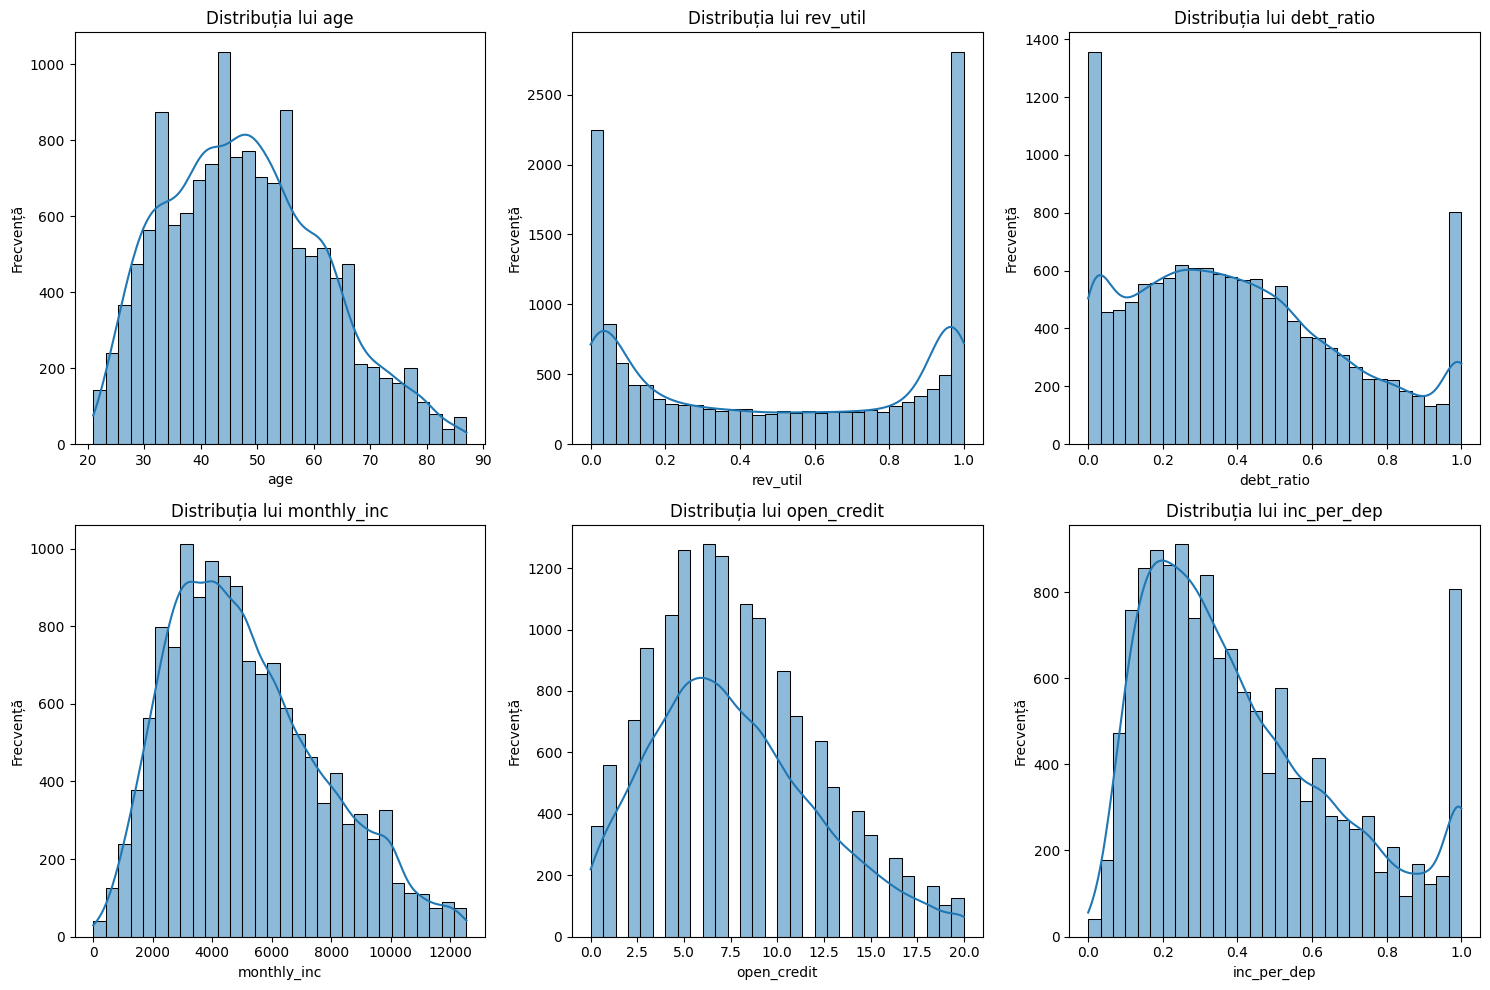

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

numeric_cols = ['age', 'rev_util', 'debt_ratio', 'monthly_inc', 'open_credit', 'inc_per_dep']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(tdf[col], bins=30, kde=True)
    plt.title(f'Distribuția lui {col}')
    plt.xlabel(col)
    plt.ylabel('Frecvență')

plt.tight_layout()
plt.show()

### Analiza historgramelor pentru caracteristica numerica:
- Se poate observa ca la rev_util si debt_ratio avem un numar foarte mare de valori in jurul capetelor -> trunchiere
- cam toate graficele sunt asimetrice la stanga -> transformari pentru asimetrie, desi cred ca nu este necesar
- open_credit are goluri -> putem sa discretizam valorile desi nu cred ca e necesar

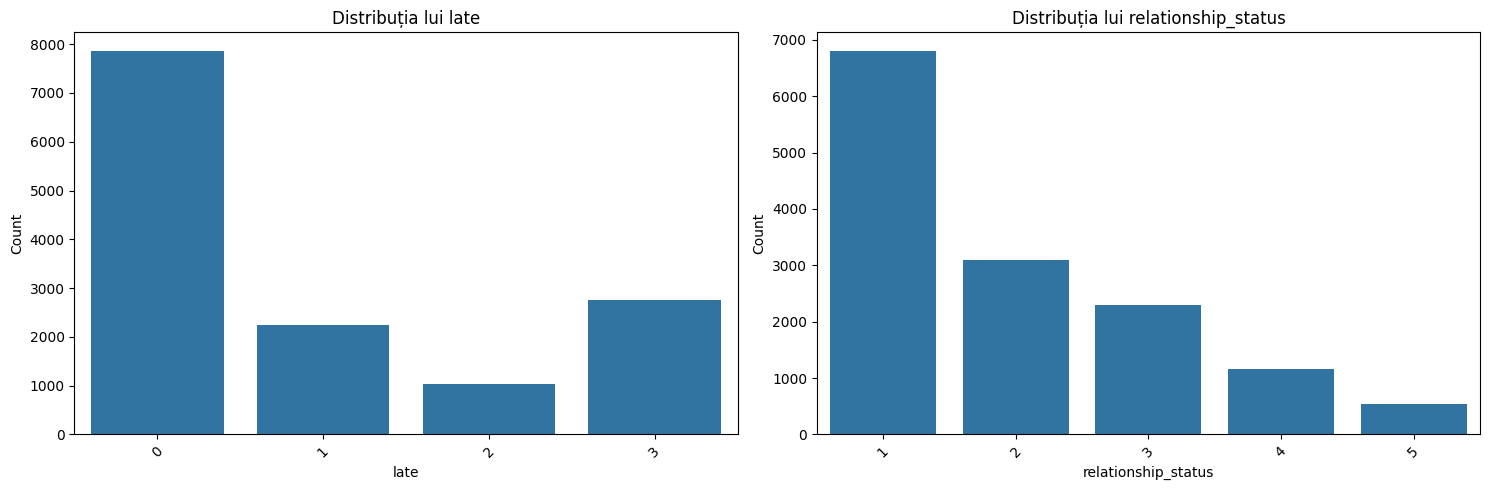

In [45]:
plt.figure(figsize=(15, 5))

# Lista cu variabilele categorice
categorical_cols = ['late', 'relationship_status']

# Creăm countplot pentru fiecare variabilă categorică
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=tdf_normalized, x=col)
    plt.title(f'Distribuția lui {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Analizam valorile categorice
1. Observam ca valorile late sunt asimetrice si majoritatea sunt 0, dar asta e normal pentru ca majoritatea oamenilor isi platesc datoriile la timp
2. Valorile de la relationship status indica ca in setul de date majoritatea persoanelor sunt intr-o relatie, ceea ce e dubios deoarece media de varsta este de 50 de ani... necesita investigatie ulterioara. Deci **majoritatea persoanelor care au timp sa  participe la aceste survey-uri nu sunt intr-o relatie ceea ce face biased acest set de date, deoarece probabil perosanele singure au un risc financiar mai mare** -> nu stiu ce sa fac cu informatia asta

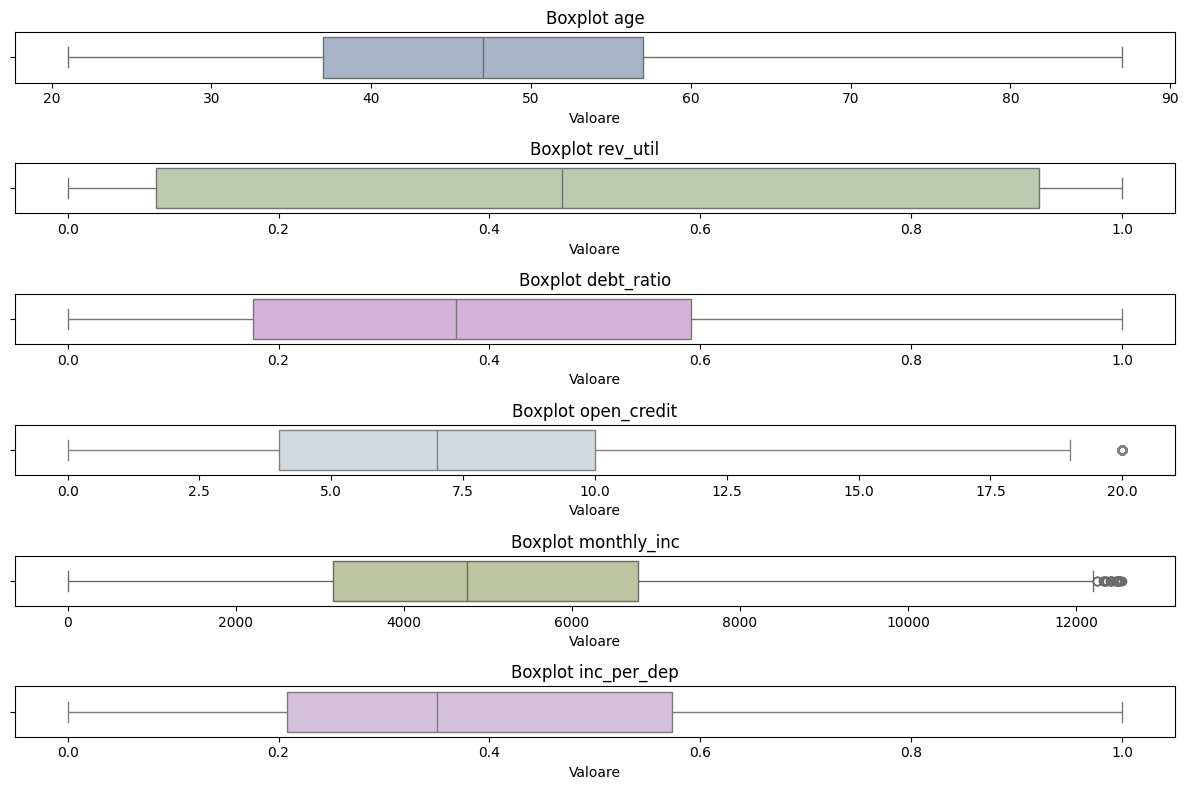

In [58]:
plt.figure(figsize=(12, 8))
import random
colors = [(random.uniform(0.6, 0.9), 
          random.uniform(0.6, 0.9), 
          random.uniform(0.6, 0.9)) for _ in numeric_cols]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=tdf, x=col, orient='h', color=colors[i-1])
    plt.title(f'Boxplot {col}')
    plt.xlabel('Valoare')
    
plt.tight_layout()
plt.show()

### Analiza Boxploturi
Se poate observa ca valorile sunt relativ ok, dar pentru monthly income ar trebuii aplicat un 99th percentile. Valorile nu sunt centrate si sunt asimetrice la stanga

In [61]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selectăm doar coloanele numerice
numeric_cols = ['age', 'rev_util', 'debt_ratio', 'monthly_inc', 'open_credit', 'inc_per_dep', 'late', 'dlq_2yrs']
corr_matrix = tdf[numeric_cols].corr(method='pearson')

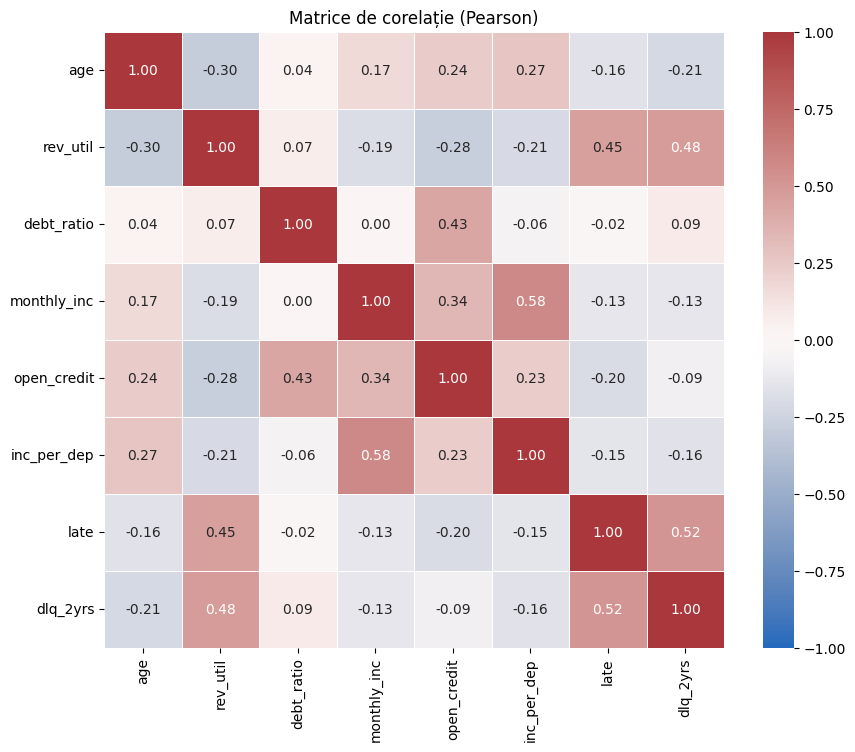

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,
            fmt=".2f",
            cmap='vlag',
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title("Matrice de corelație (Pearson)")
plt.show()

### Analiza Heatmap
Putem observa ca in legatura cu dlq_2yrs cea mai puternica corelatie este cu rev_util- cat de mult din limita cardului a fost folosita cat si cu late(0,5). Alte pattern-uri interesante sunt corelatia dintre inc_per_dep si montly income, dintre late si rev_util si intre debt_ratio si open_credit, corelatii care au sens. Cat si intre open_credit si monthly_inc.

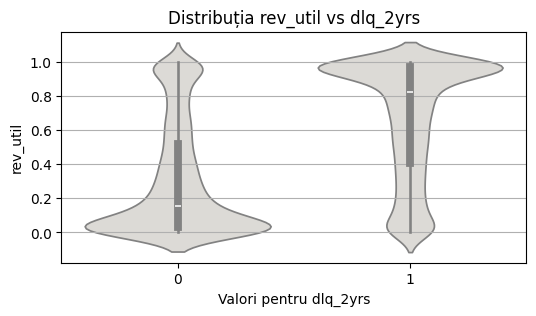

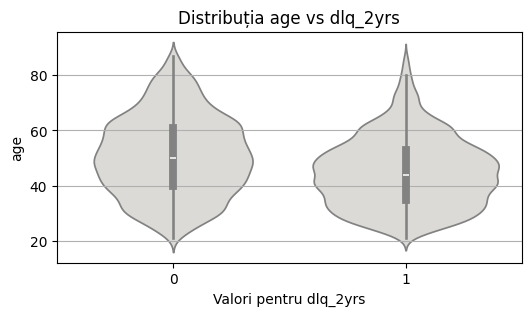

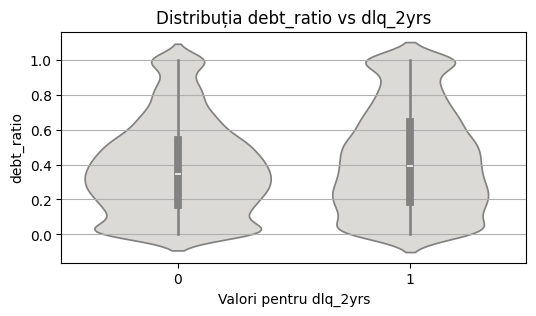

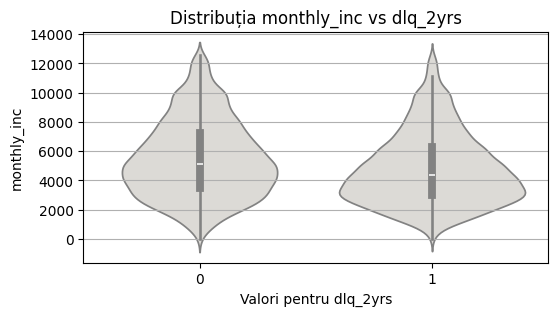

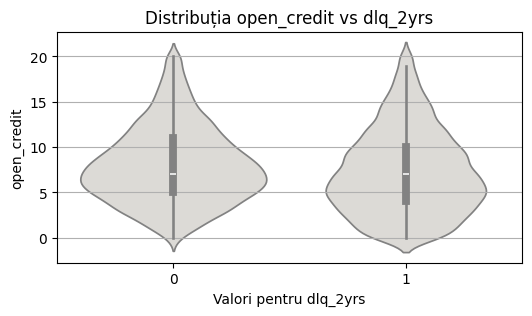

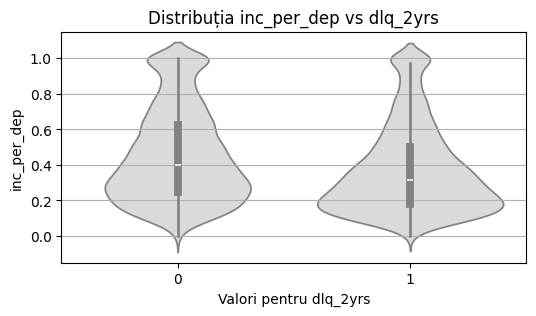

In [87]:
import matplotlib.pyplot as plt

nume_tinta = 'dlq_2yrs'
lista_caracteristici_numerice = [
    'rev_util', 
    'age', 
    'debt_ratio', 
    'monthly_inc', 
    'open_credit',
    'inc_per_dep', 

]

coloane_existente = [col for col in lista_caracteristici_numerice if col in tdf.columns]
colors = [(random.uniform(0.6, 0.9), 
          random.uniform(0.6, 0.9), 
          random.uniform(0.6, 0.9)) for _ in lista_caracteristici_numerice]

for caracteristica in coloane_existente:
    plt.figure(figsize=(6, 3))
    sns.violinplot(data=tdf, x=nume_tinta, y=caracteristica, color=colors[int(random.random())%6])
    plt.title(f'Distribuția {caracteristica} vs {nume_tinta}')
    plt.xlabel(f'Valori pentru {nume_tinta}')
    plt.ylabel(caracteristica)
    plt.grid(True, axis='y')
    plt.show()


## violin plots conclusion
Putem observa ca distributiile de la rev_util sunt opuse.
La montly_inc vs delq_2years se observa ca cu cat scade salariul cu atat e mai probabil ca persoanele sa aiba o intarziere grava.
De asemenea, cu cat income-ul e mai mic pe membru, cu atat probabilitatea sa nu isi plateasca ratele creste. De asemenea persoanele cu varsta de 40 de ani au mai multe sanse sa aiba o intarziere grava

In [62]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 36.6 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.4.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.model_selection import train_test_split
# split the dataset back to the original form
train, test = train_test_split(tdf, test_size=0.1, random_state=42, stratify=tdf['dlq_2yrs'])

# Antrenarea si compararea a 3 algoritmi diferiti
Dupa cum stim variabila dlq_2yrs este discreta deci avem o problema de clasificare, asadar vom alege 3 algoritmi:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
## 1. Logistic Regression
Acuratete cu parametrii max_iter = 3000 -> 0.76

In [191]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train = train.drop('dlq_2yrs', axis=1)
y_train = train['dlq_2yrs']

X_test = test.drop('dlq_2yrs', axis=1)
y_test = test['dlq_2yrs']

model = LogisticRegression(max_iter=3000)

model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [192]:
accuracy_score(y_test, y_pred_lr)

0.763768115942029

## 2. Decision Tree Classifier
acuratete cu parametrii 5, 2, 42 -> 0.75

In [193]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

In [194]:
accuracy_score(y_test, y_pred_dt)

0.7572463768115942

## 3. Random Forest Classifier
acuratete cu parametrii 300, 7, 2, 42 -> 76%

In [195]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_split=2,
    random_state=42
)

model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

In [196]:
accuracy_score(y_test, y_pred_rf)

0.7673913043478261

## SVM
acuratete initiala - 0.76

In [206]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(
    kernel='rbf',
    C=1.0,
    gamma=0.1,
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_preds = model.predict(X_test_scaled)

[CV] END ...C=0.1, class_weight=None, gamma=0.01, kernel=rbf; total time=  49.0s
[CV] END ..C=0.1, class_weight=None, gamma=scale, kernel=rbf; total time=  35.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  38.5s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=  34.6s
[CV] END ......C=1, class_weight=None, gamma=0.1, kernel=rbf; total time=  34.9s
[CV] END ....C=1, class_weight=None, gamma=scale, kernel=rbf; total time=  32.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  35.6s
[CV] END ....C=10, class_weight=None, gamma=0.01, kernel=rbf; total time=  33.5s
[CV] END .....C=10, class_weight=None, gamma=0.1, kernel=rbf; total time= 1.0min
[CV] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  36.8s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  58.3s
[CV] END ....C=0.1, class_weight=None, gamma=0.1, kernel=rbf; total time=  47.6s
[CV] END ..C=0.1, class_we

In [201]:
accuracy_score(y_test, y_preds)

0.7608695652173914

## Tabel performata acuratete

In [157]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_preds,
}

results = []

for name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression    0.7638
1        Decision Tree    0.7572
2        Random Forest    0.7674
3                  SVM    0.7609


Din acest tabel lectorul observa ca random forest obtine cea mai buna acuratete, urmat de logistic regressio si svm. Digerentelele sunt mici, sugerand ca setul de date are limitari in separarea claselor sau paramettrii modelelor ar putea fi optimizate pentru o performanta mai ridicata. In orice caz, random forest pare a fi cea mai buna optiune.
## Matricea de confuzie

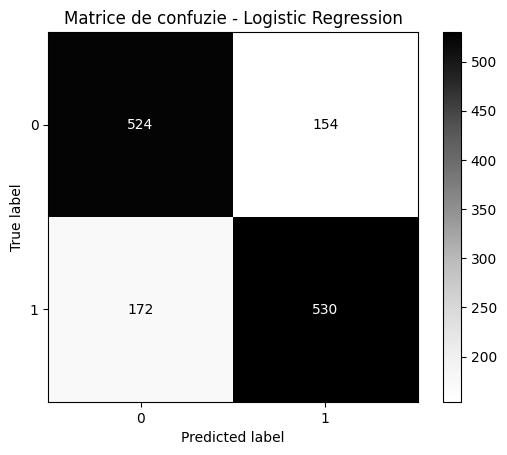

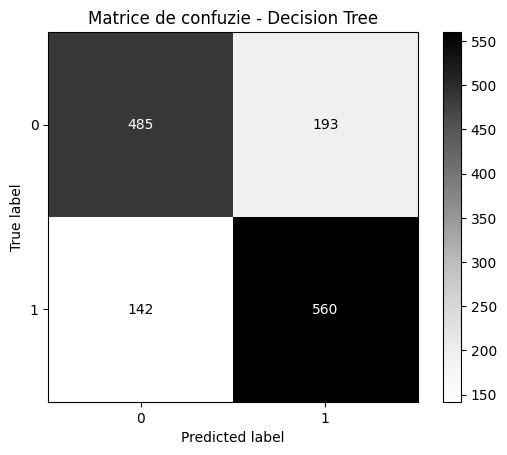

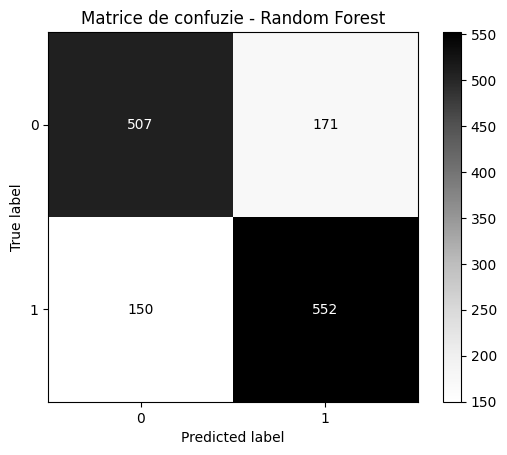

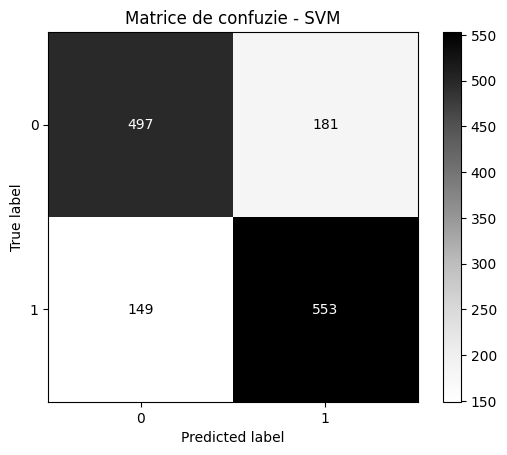

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Greys')
    plt.title(f'Matrice de confuzie - {model_name}')
    plt.show()

for model_name, y_pred in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)

Matricile de confuzie arata predictii oarecum echilibrate intre 0 si 1, intrucat setul de date este destul de mic